In [9]:
import openpyxl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wb = openpyxl.load_workbook("Data.xlsx")

In [3]:
read_file = pd.read_excel (r'Data.xlsx')
read_file.to_csv (r'data.csv', index = None, header=True)

In [4]:
data=read_file
data=data.replace(np.nan,0)
data=data.replace("*",1)

In [5]:
data.columns
data=data.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])

In [6]:
data

,شناسه جمله,دسته,گوینده,خطای علائم نگارشی,خطای اعراب,خطای پیاده سازی اشتباه,خطای بیشتر از ۵۰ کلمه,خطای کمتر از ۱۰ کلمه,خطای اعداد به رقم,خطای کلمات دخیل
0,100000,الف,1,1,0.0,1,1,0,1,1
1,100001,الف,2,0,0.0,1,0,0,1,1
2,100002,الف,3,0,0.0,0,0,0,0,0
3,100003,الف,1,0,0.0,0,0,0,0,0
4,100004,الف,2,0,0.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
443,100443,ج,2,0,0.0,0,0,1,0,0
444,100444,ج,5,0,0.0,0,1,0,0,0
445,100445,ج,2,0,0.0,0,1,0,1,1
446,100446,ج,5,0,0.0,0,0,0,0,0


In [35]:
data=data.rename({"شناسه جمله":"Sentence Id","دسته":"Type","گوینده":"Speaker","خطای علائم نگارشی":"Spelling errors","خطای اعراب":"The mistake of the Arabs","خطای پیاده سازی اشتباه":"implementation error","خطای بیشتر از ۵۰ کلمه":"Error more than 50 words","خطای کمتر از ۱۰ کلمه":"Error less than 10 words","خطای اعداد به رقم":"Error of numbers to digits","خطای کلمات دخیل":"Error of words involved"},axis=1)
data

,Sentence Id,Type,Speaker,Spelling errors,The mistake of the Arabs,implementation error,Error more than 50 words,Error less than 10 words,Error of numbers to digits,Error of words involved
0,100000,الف,1,1,0.0,1,1,0,1,1
1,100001,الف,2,0,0.0,1,0,0,1,1
2,100002,الف,3,0,0.0,0,0,0,0,0
3,100003,الف,1,0,0.0,0,0,0,0,0
4,100004,الف,2,0,0.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
443,100443,ج,2,0,0.0,0,0,1,0,0
444,100444,ج,5,0,0.0,0,1,0,0,0
445,100445,ج,2,0,0.0,0,1,0,1,1
446,100446,ج,5,0,0.0,0,0,0,0,0


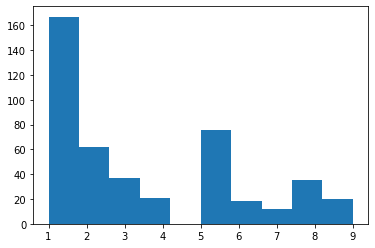

In [8]:
plt.hist(data["گوینده"])
plt.show()

In [99]:
#correlation:
data1=data.drop(columns=["Sentence Id","The mistake of the Arabs"])
data1

,Type,Speaker,Spelling errors,implementation error,Error more than 50 words,Error less than 10 words,Error of numbers to digits,Error of words involved
0,الف,1,1,1,1,0,1,1
1,الف,2,0,1,0,0,1,1
2,الف,3,0,0,0,0,0,0
3,الف,1,0,0,0,0,0,0
4,الف,2,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
443,ج,2,0,0,0,1,0,0
444,ج,5,0,0,1,0,0,0
445,ج,2,0,0,1,0,1,1
446,ج,5,0,0,0,0,0,0


In [39]:
data1.corr()

,Speaker,Spelling errors,implementation error,Error more than 50 words,Error less than 10 words,Error of numbers to digits,Error of words involved
Speaker,1.000000,-0.025394,-0.078076,0.039997,-0.450200,0.112883,0.006819
Spelling errors,-0.025394,1.000000,0.041663,0.062178,-0.014022,-0.065301,0.009968
implementation error,-0.078076,0.041663,1.000000,0.015660,0.044459,0.101476,-0.042220
Error more than 50 words,0.039997,0.062178,0.015660,1.000000,-0.107556,-0.024764,0.009196
Error less than 10 words,-0.450200,-0.014022,0.044459,-0.107556,1.000000,-0.118454,-0.038731
Error of numbers to digits,0.112883,-0.065301,0.101476,-0.024764,-0.118454,1.000000,-0.027038
Error of words involved,0.006819,0.009968,-0.042220,0.009196,-0.038731,-0.027038,1.000000


Text(21.531536458333342, 0.5, 'Running Error')

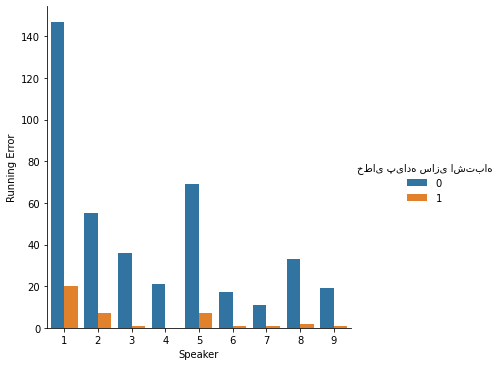

In [21]:
sns.catplot(x="گوینده",hue="خطای پیاده سازی اشتباه",data=data1,kind="count")
plt.xlabel("Speaker")
plt.ylabel("Running Error")

In [77]:
x=data1.sum()
print(x)

Spelling errors                21
implementation error           40
Error more than 50 words       18
Error less than 10 words       97
Error of numbers to digits     97
Error of words involved       140
dtype: int64


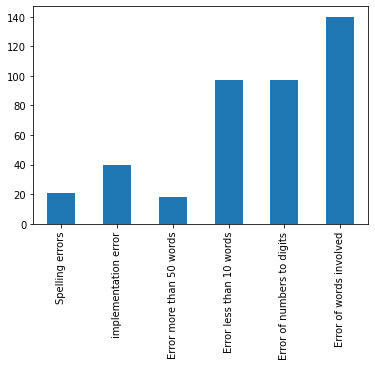

In [90]:
#Which Error Occurs the Most?
data1.sum().plot(kind="bar")
plt.show()

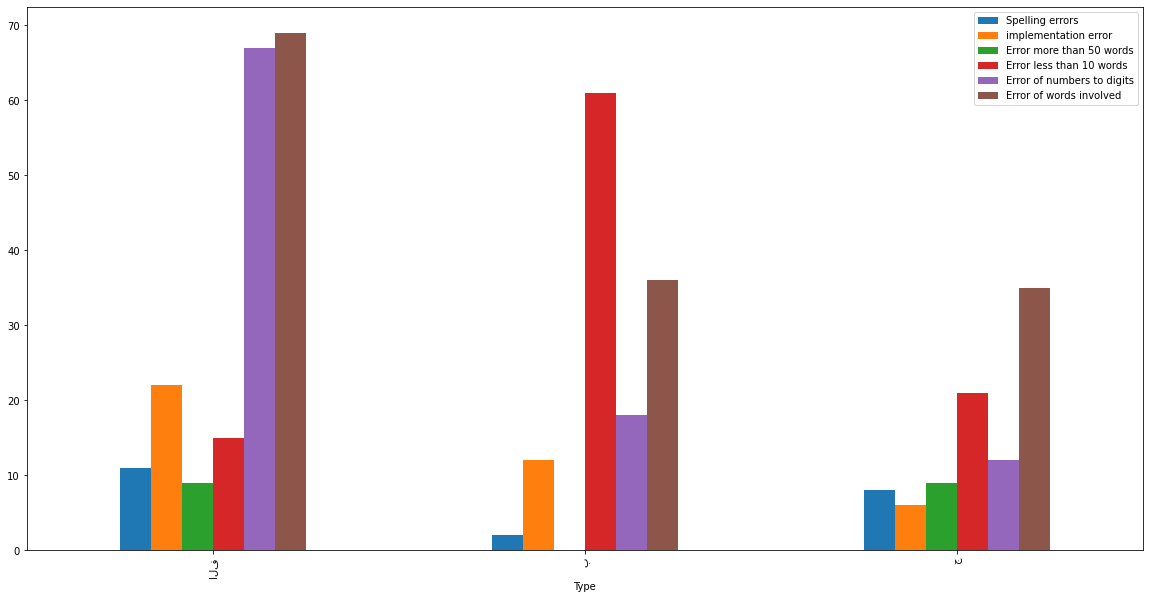

In [97]:
#Type:
#sum of errors for each type
data1.groupby("Type").sum().plot(kind="bar",figsize=(20, 10))
plt.show()

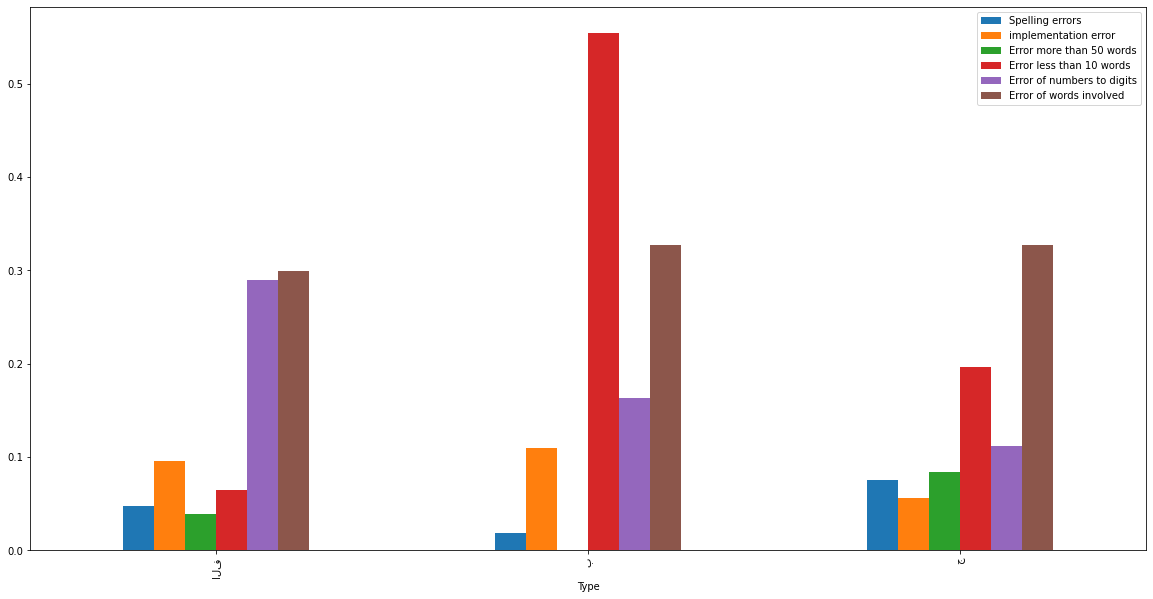

In [98]:
#mean of each words for each type
data1.groupby("Type").mean().plot(kind="bar",figsize=(20, 10))
plt.show()

In [85]:
data.groupby("Type")["Error of words involved"].mean()

Type
الف    0.298701
ب      0.327273
ج      0.327103
Name: Error of words involved, dtype: float64

In [86]:
data.groupby("Type")["Error less than 10 words"].mean()

Type
الف    0.064935
ب      0.554545
ج      0.196262
Name: Error less than 10 words, dtype: float64

In [87]:
data.groupby("Type")["Error of numbers to digits"].mean()

Type
الف    0.290043
ب      0.163636
ج      0.112150
Name: Error of numbers to digits, dtype: float64

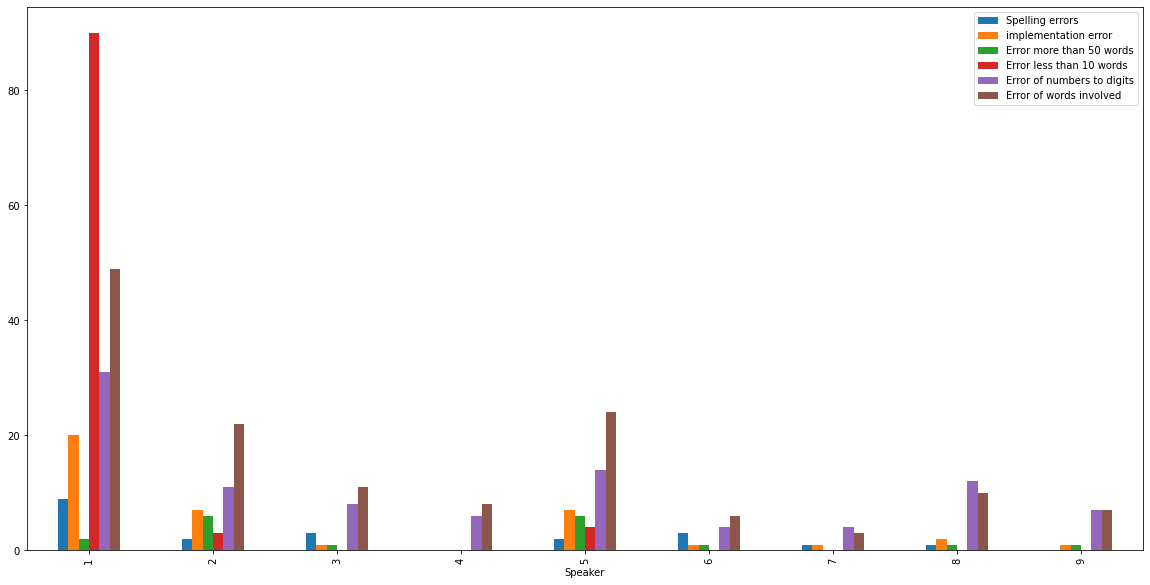

In [101]:
#Speaker:
data1.groupby("Speaker").sum().plot(kind="bar",figsize=(20, 10))
plt.show()

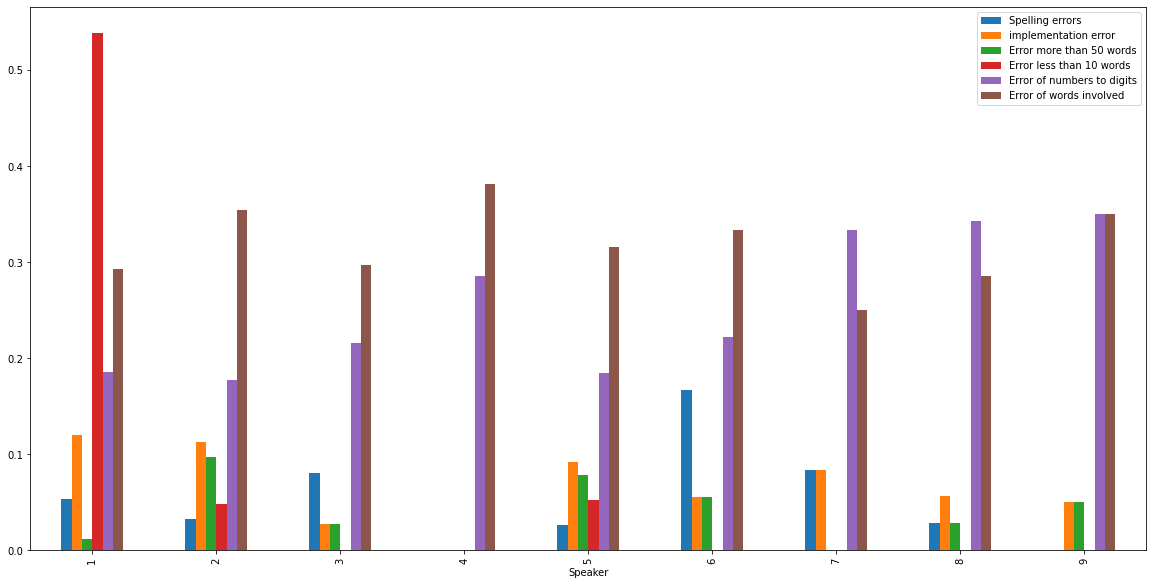

In [102]:
data1.groupby("Speaker").mean().plot(kind="bar",figsize=(20, 10))
plt.show()

In [107]:
data1.groupby("Speaker").mean()

,Spelling errors,implementation error,Error more than 50 words,Error less than 10 words,Error of numbers to digits,Error of words involved
Speaker,,,,,,
1,0.053892,0.119760,0.011976,0.538922,0.185629,0.293413
2,0.032258,0.112903,0.096774,0.048387,0.177419,0.354839
3,0.081081,0.027027,0.027027,0.000000,0.216216,0.297297
4,0.000000,0.000000,0.000000,0.000000,0.285714,0.380952
5,0.026316,0.092105,0.078947,0.052632,0.184211,0.315789
6,0.166667,0.055556,0.055556,0.000000,0.222222,0.333333
7,0.083333,0.083333,0.000000,0.000000,0.333333,0.250000
8,0.028571,0.057143,0.028571,0.000000,0.342857,0.285714
9,0.000000,0.050000,0.050000,0.000000,0.350000,0.350000
